# Part 1

In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt

chess2.jpeg
False None
chess3.jpeg
False None
chessboard.jpeg
True [[[ 93.886345 456.31274 ]]

 [[ 97.17979  392.73434 ]]

 [[101.82527  330.8246  ]]

 [[106.58655  273.65063 ]]

 [[110.98326  220.61777 ]]

 [[117.68369  169.74718 ]]

 [[124.17216  121.830826]]

 [[155.38313  456.7211  ]]

 [[158.71512  391.86917 ]]

 [[161.26085  330.24188 ]]

 [[165.07433  271.44846 ]]

 [[168.89012  217.242   ]]

 [[172.73633  164.90533 ]]

 [[176.89314  118.70522 ]]

 [[224.4734   456.8333  ]]

 [[223.08131  391.55478 ]]

 [[223.75856  328.7334  ]]

 [[225.7087   270.01688 ]]

 [[227.353    213.94994 ]]

 [[228.87822  162.97308 ]]

 [[231.04732  115.20115 ]]

 [[289.50064  456.59106 ]]

 [[289.0147   390.00952 ]]

 [[288.30432  326.65613 ]]

 [[287.5987   267.21136 ]]

 [[287.24243  211.62718 ]]

 [[287.56836  159.29271 ]]

 [[287.52722  112.94119 ]]

 [[358.46658  454.5623  ]]

 [[355.53552  388.19464 ]]

 [[353.066    324.9977  ]]

 [[350.62848  265.47324 ]]

 [[347.69855  210.45459 ]]

 [[345.86

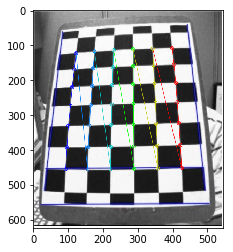

In [23]:
#define a termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

#prepare object points
objp = np.zeros((6*7, 3), np.float32)
objp[:, :2] = np.mgrid[0:7,0:6].T.reshape(-1, 2)

#arrays to store object points and image points for all the images
objpoints = [] #3D points in the real world space
imgpoints = [] #2D points i the image plane

images= glob.glob('*.jpeg')

for fname in images:
    img = cv2.imread(fname)
    print(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    #Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (7, 6), None)
    print(ret, corners)
    #Add object points and image points after refinement
    if ret == True:
        objpoints.append(objp)

        cv2.cornerSubPix(gray, corners, (11, 11), (-1, -1), criteria)
        imgpoints.append(corners)

        #draw and display the corners
        cv2.drawChessboardCorners(img, (7, 6), corners, ret)
        plt.imshow(img)
        plt.show()

In [15]:
ret, mtx, dist, revecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

In [16]:
img = cv2.imread('chessboard.jpeg')
h, w = img.shape[:2]
newcameramtx, roi = cv2.getOptimalNewCameraMatrix(mtx, dist, (w, h), 1, (w, h))

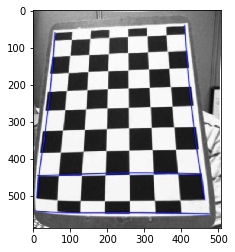

In [17]:
#preform undistortion
dst = cv2.undistort(img, mtx, dist, None, newcameramtx)

x, y, w, h = roi
dst = dst[y:y+h, x:x+w]
cv2.imwrite('calibresult.png', dst)
plt.imshow(dst)

# Part 2

In [25]:
#Retrieve camera matrix and distortion coefficient
def draw(img, corners, imgpts):
    """
    corners : 4 corners of the chessboard.
    imgpts : endpoint of our axis lines in each of the 3 directions.
    """
    corner = tuple(corners[0].ravel())
    img = cv2.line(img, corner, tuple(imgpts[0].ravel()), (255, 0, 0), 5)
    img = cv2.line(img, corner, tuple(imgpts[1].ravel()), (0, 255, 0), 5)
    img = cv2.line(img, corner, tuple(imgpts[2].ravel()), (0, 0, 255), 5)
    return img

In [26]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
objp = np.zeros((6*7, 3), np.float32)
objp[:, :2] = np.mgrid[0:7, 0:6].T.reshape(-1, 2)

axis = np.float32([[3, 0, 0], [0, 3, 0], [0, 0, -3]]).reshape(-1, 3)

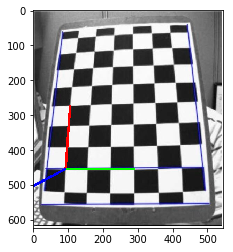

In [34]:

images= glob.glob('*.jpeg')

for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    #Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (7, 6), None)
    #Add object points and image points after refinement
    if ret == True:
        corners2 = cv2.cornerSubPix(gray, corners, (11, 11), (-1, -1), criteria)

        #find rotation and translation vectors
        _, rvecs, tvecs, inliers = cv2.solvePnPRansac(objp, corners2, mtx, dist)
        
        #project 3d points to image plane
        imgpts, jac = cv2.projectPoints(axis, rvecs, tvecs, mtx, dist)
        img = draw(img, corners2, imgpts)
        plt.imshow(img)

## Render a cube

In [38]:
def draw(img, corners, imgpts):
    imgpts = np.int32(imgpts).reshape(-1, 2)

    #draw ground floor in green
    img = cv2.drawContours(img, [imgpts[:4]], -1, (0, 255, 0), -3)

    #draw pillars in blue color
    for i, j in zip(range(4), range(4, 8)):
        img = cv2.line(img, tuple(imgpts[i]), tuple(imgpts[j]), (255), 3)

    #draw top layer in red
    img = cv2.drawContours(img, [imgpts[4:]], -1, (0, 0, 255), 3)
    return img

In [39]:
#modify axis points to include the corners of the cube
axis = np.float32([[0, 0, 0], [0, 3, 0], [3, 3, 0], [3, 0, 0], [0, 0, -3], [0, 3, -3], [3, 3, -3], [3, 0, -3]])

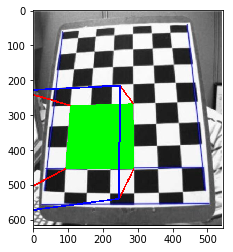

In [40]:

images= glob.glob('*.jpeg')

for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    #Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (7, 6), None)
    #Add object points and image points after refinement
    if ret == True:
        corners2 = cv2.cornerSubPix(gray, corners, (11, 11), (-1, -1), criteria)

        #find rotation and translation vectors
        _, rvecs, tvecs, inliers = cv2.solvePnPRansac(objp, corners2, mtx, dist)
        
        #project 3d points to image plane
        imgpts, jac = cv2.projectPoints(axis, rvecs, tvecs, mtx, dist)
        img = draw(img, corners2, imgpts)
        plt.imshow(img)

# Part 3

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [25]:
img1 = cv2.imread('laptop_left.jpg')
img2 = cv2.imread('laptop_right.jpg')

In [26]:
sift = cv2.xfeatures2d.SIFT_create()
#find keypoints descriptors
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

#FLANN parameters
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)

flann = cv2.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1, des2, k = 2)

good = []
pts1 = []
pts2 = []

for i, (m, n) in enumerate(matches):
    if m.distance < 0.8*n.distance:
        good.append(m)
        pts2.append(kp2[m.trainIdx].pt)
        pts1.append(kp1[m.queryIdx].pt)

In [27]:
#Calculate the fundamental matrix
pts1 = np.int32(pts1)
pts2 = np.int32(pts2)
F, mask = cv2.findFundamentalMat(pts1, pts2, cv2.FM_LMEDS)

#Select only inlier points
pts1 = pts1[mask.ravel() == 1]
pts2 = pts2[mask.ravel() == 1]

In [28]:
colors = np.random.randint(0,255,(256, 3))
def drawlines(img,lines,pts1, pts2):
    ''' img1 - image on which we draw the epilines for the points in img2
        lines - corresponding epilines '''
    _, c = img.shape[:2]
    
    i = 0
    for r, pt1, pt2 in zip(lines, pts1, pts2):
        i += 1
        color = colors[i % 256].tolist()
        x0,y0 = map(int, [0, -r[2]/r[1] ])
        x1,y1 = map(int, [c, -(r[2]+r[0]*c)/r[1] ])
        cv2.line(img, (x0,y0), (x1,y1), color, 1)
        cv2.circle(img, tuple(pt1), 5 , color, -1)
    return img


(68, 3) (68, 3)


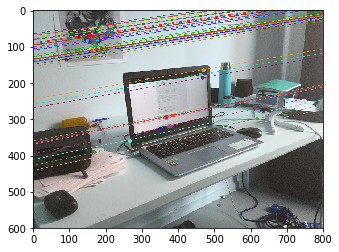

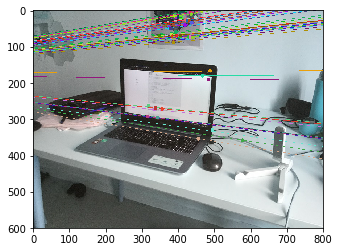

In [29]:
#finding and drawing epilines on the right image
lines1 = cv2.computeCorrespondEpilines(pts2.reshape(-1, 1, 2), 2, F)
lines1 = lines1.reshape(-1, 3)
img5 = drawlines(img1, lines1, pts1, pts2)

#on the left image
lines2 = cv2.computeCorrespondEpilines(pts1.reshape(-1, 1, 2), 1, F)
lines2 = lines2.reshape(-1, 3)
img3 = drawlines(img2, lines2, pts2, pts1)
print(lines1.shape, lines2.shape)
plt.imshow(img5)
plt.show()
plt.imshow(img3)
plt.show()


In [30]:

cv2.imwrite('foo1.jpg',img5)
cv2.imwrite('foo2.jpg',img3)


True

# Part 4

In [2]:
imgL = cv2.imread('left.jpg')
imgR = cv2.imread('right.jpg')

imgL_new=cv2.cvtColor(imgL, cv2.COLOR_BGR2GRAY)
imgR_new=cv2.cvtColor(imgR, cv2.COLOR_BGR2GRAY)

In [40]:
stereo = cv2.StereoSGBM_create(numDisparities = 256, blockSize = 11, minDisparity = 0, P1 = 1, P2 = 3, uniquenessRatio = 10)
disparity = stereo.compute(imgL_new, imgR_new)

disparity = (disparity-np.min(disparity))/(np.max(disparity)-np.min(disparity))


plt.imshow(disparity)
plt.show()

TypeError: 'SADWindowSize' is an invalid keyword argument for StereoSGBM_create()

In [37]:
#disparity = 255*disparity.astype('int')
print(np.max(disparity))
#disparity = cv2.convertScaleAbs(disparity, alpha=(255.0))
plt.imsave('heatmap.jpg', disparity)

1.0
